# Traveling Salesperson Problem

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def randomize_cities(num_nodes: int):
    positions = np.random.rand(num_nodes, 2)

    fig, ax = plt.subplots()
    ax.scatter(positions[:, 0], positions[:, 1], color='blue')

    for i, (x, y) in enumerate(positions):
        ax.text(x, y, f'N{i}', fontsize=12, ha='right')

    plt.title("Randomized cities")
    plt.grid(True)
    plt.show()

    # pairwise distance using Euclidean distance
    dist = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            dist[i, j] = np.linalg.norm(positions[i] - positions[j])
    return dist


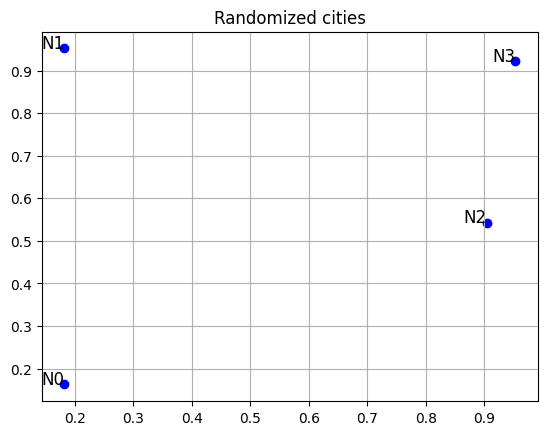

In [14]:
weights = randomize_cities(4)

For $N$ cities, use $N^2$ binary variables x(i,p), where i represents the index of a city and p represents the order of the city in the route. In other words, if city i is visited at step p of the route, then x(i,p) = 1.

Constraints\
This euations ensure that each city is visited only once, and each step of the route is in one city.
$
\begin{gather}
\sum_{p=0}^{N-1} ( 1 - \sum_{i=0}^{N-1} x(i, p) )^2 = 0 \\
\sum_{i=0}^{N-1} ( 1 - \sum_{p=0}^{N-1} x(i, p) )^2 = 0 \\ 
\sum_{i=0}^{N-1} x_{i, p} = 1,\ for\ all\ p \\
\sum_{p=0}^{N-1} x_{i, p} = 1,\ for\ all\ i \\
\end{gather}
$

Objective\
Find the shortest Hamiltonian cycle in a graph
$
\begin{gather}
C(x) = \sum_{i, j} w_{i, j} \sum_{p=0}^{N-1} x_{i, p}x_{j, p + 1}  \\
\end{gather}
$

In [15]:
weights

array([[0.        , 0.78898985, 0.81581523, 1.08130319],
       [0.78898985, 0.        , 0.82984582, 0.77142001],
       [0.81581523, 0.82984582, 0.        , 0.38160634],
       [1.08130319, 0.77142001, 0.38160634, 0.        ]])

In [16]:
int_dists = (weights * 10).astype(int)
int_dists

array([[ 0,  7,  8, 10],
       [ 7,  0,  8,  7],
       [ 8,  8,  0,  3],
       [10,  7,  3,  0]])

In [17]:
from qiskit_optimization import QuadraticProgram



qp = QuadraticProgram()

size = int_dists.shape[0]

cities = {} # dictionary to store the city and order
for i in range(size):
    for p in range(size):
        cities[f'x_{i}_{p}'] = qp.binary_var(f'x_{i}_{p}')
        




# Objective function
quadratic_matrix = {}
for i in range(size):
    for j in range(size):
        if i != j:
            for p in range(size):
                quadratic_matrix[(f'x_{i}_{p}', f'x_{j}_{(p+1)%size}')] = int_dists[i, j] 

qp.minimize(quadratic=quadratic_matrix)
                
# Constraint 1: each city is visited exactly once
for i in range(size):
    qp.linear_constraint(linear={f'x_{i}_{p}': 1 for p in range(size)}, sense='==', rhs=1)

# Constraint 2: each city is left exactly once
for p in range(size):
    qp.linear_constraint(linear={f'x_{i}_{p}': 1 for i in range(size)}, sense='==', rhs=1)

print(qp.prettyprint())



Problem name: 

Minimize
  7*x_0_0*x_1_1 + 7*x_0_0*x_1_3 + 8*x_0_0*x_2_1 + 8*x_0_0*x_2_3 + 10*x_0_0*x_3_1
  + 10*x_0_0*x_3_3 + 7*x_0_1*x_1_0 + 7*x_0_1*x_1_2 + 8*x_0_1*x_2_0
  + 8*x_0_1*x_2_2 + 10*x_0_1*x_3_0 + 10*x_0_1*x_3_2 + 7*x_0_2*x_1_1
  + 7*x_0_2*x_1_3 + 8*x_0_2*x_2_1 + 8*x_0_2*x_2_3 + 10*x_0_2*x_3_1
  + 10*x_0_2*x_3_3 + 7*x_0_3*x_1_0 + 7*x_0_3*x_1_2 + 8*x_0_3*x_2_0
  + 8*x_0_3*x_2_2 + 10*x_0_3*x_3_0 + 10*x_0_3*x_3_2 + 8*x_1_0*x_2_1
  + 8*x_1_0*x_2_3 + 7*x_1_0*x_3_1 + 7*x_1_0*x_3_3 + 8*x_1_1*x_2_0
  + 8*x_1_1*x_2_2 + 7*x_1_1*x_3_0 + 7*x_1_1*x_3_2 + 8*x_1_2*x_2_1
  + 8*x_1_2*x_2_3 + 7*x_1_2*x_3_1 + 7*x_1_2*x_3_3 + 8*x_1_3*x_2_0
  + 8*x_1_3*x_2_2 + 7*x_1_3*x_3_0 + 7*x_1_3*x_3_2 + 3*x_2_0*x_3_1
  + 3*x_2_0*x_3_3 + 3*x_2_1*x_3_0 + 3*x_2_1*x_3_2 + 3*x_2_2*x_3_1
  + 3*x_2_2*x_3_3 + 3*x_2_3*x_3_0 + 3*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 + x_2_3 == 1  'c2'
    x

In [18]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

print('Offset:', offset)
print('Ising Hamiltonian:')
print(str(qubitOp))


Offset: 5606.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIIII

In [19]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import NumPyMinimumEigensolver

exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result.prettyprint())

def reorder(x, size):
    y = np.zeros(size)
    for i, v in enumerate(x):
        if v == 1:
            y[int(i) % size] = i // size
    return y

print(reorder(result.samples[0].x, size))
   

objective function value: 25.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=1.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=1.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0
status: SUCCESS
[3. 2. 0. 1.]


In [20]:
# from qiskit.circuit.library import EfficientSU2 # for the ansatz
# ansatz = EfficientSU2(qubitOp.num_qubits)
# display(ansatz.draw(output='mpl'))

# print("decompose")
# ansatz.decompose().draw(output='mpl')

# Qiskit TSP class

In [21]:
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Tsp
from qiskit_algorithms import SamplingVQE
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler

import networkx as nx

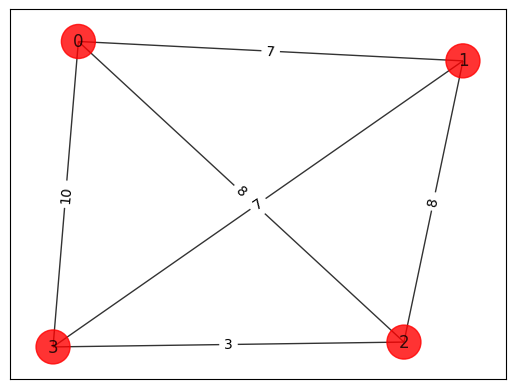

In [22]:
n = len(int_dists)
num_qubits = n**2

G = nx.Graph()
G.add_nodes_from(np.arange(n))
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

for i in range(n):
    for j in range(i):
        G.add_edge(i, j, weight=int_dists[i, j])

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)
tsp = Tsp(G)

# Brute force

Best order from brute force = (0, 1, 3, 2) with total distance = 25


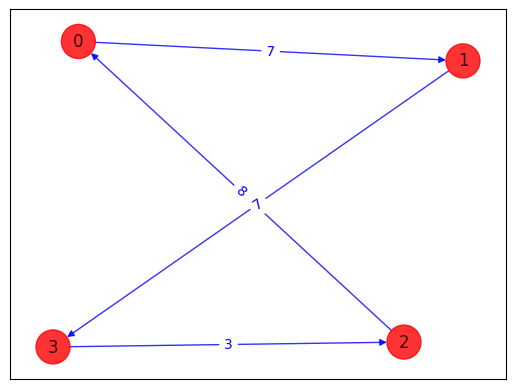

In [23]:
from itertools import permutations

def brute_force_tsp(w):
    min_cost = np.inf
    min_path = None
    for p in permutations(range(1, len(w))):
        cost = w[0][p[0]]
        for i in range(len(p) - 1):
            cost += w[p[i]][p[i + 1]]
        cost += w[p[-1]][0]
        if cost < min_cost:
            min_cost = cost
            min_path = (0,) + p
    return min_cost, min_path

best_distance, best_order = brute_force_tsp(int_dists)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)

def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)


In [24]:
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

Problem name: TSP

Minimize
  7*x_0_0*x_1_1 + 7*x_0_0*x_1_3 + 8*x_0_0*x_2_1 + 8*x_0_0*x_2_3 + 10*x_0_0*x_3_1
  + 10*x_0_0*x_3_3 + 7*x_0_1*x_1_0 + 7*x_0_1*x_1_2 + 8*x_0_1*x_2_0
  + 8*x_0_1*x_2_2 + 10*x_0_1*x_3_0 + 10*x_0_1*x_3_2 + 7*x_0_2*x_1_1
  + 7*x_0_2*x_1_3 + 8*x_0_2*x_2_1 + 8*x_0_2*x_2_3 + 10*x_0_2*x_3_1
  + 10*x_0_2*x_3_3 + 7*x_0_3*x_1_0 + 7*x_0_3*x_1_2 + 8*x_0_3*x_2_0
  + 8*x_0_3*x_2_2 + 10*x_0_3*x_3_0 + 10*x_0_3*x_3_2 + 8*x_1_0*x_2_1
  + 8*x_1_0*x_2_3 + 7*x_1_0*x_3_1 + 7*x_1_0*x_3_3 + 8*x_1_1*x_2_0
  + 8*x_1_1*x_2_2 + 7*x_1_1*x_3_0 + 7*x_1_1*x_3_2 + 8*x_1_2*x_2_1
  + 8*x_1_2*x_2_3 + 7*x_1_2*x_3_1 + 7*x_1_2*x_3_3 + 8*x_1_3*x_2_0
  + 8*x_1_3*x_2_2 + 7*x_1_3*x_3_0 + 7*x_1_3*x_3_2 + 3*x_2_0*x_3_1
  + 3*x_2_0*x_3_3 + 3*x_2_1*x_3_0 + 3*x_2_1*x_3_2 + 3*x_2_2*x_3_1
  + 3*x_2_2*x_3_3 + 3*x_2_3*x_3_0 + 3*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 + x_2_3 == 1  'c2'
  

In [25]:
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 5606.0
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIIII

In [26]:
result = exact.solve(qubo)
print(result.prettyprint())

objective function value: 25.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=1.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=1.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=1.0, x_3_1=0.0, x_3_2=0.0, x_3_3=0.0
status: SUCCESS


energy: -5581.000000000015
tsp objective: 24.999999999985448
feasible: True
solution: [2, 0, 1, 3]
solution objective: 25.0


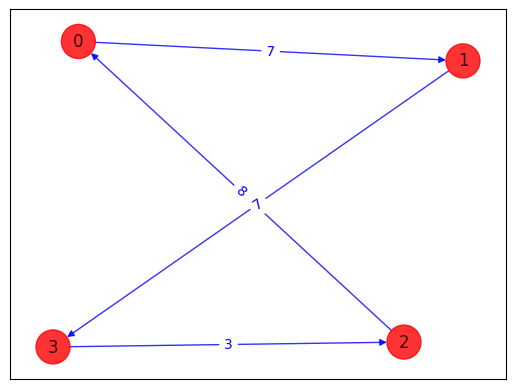

In [27]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("tsp objective:", result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, int_dists))
draw_tsp_solution(tsp.graph, z, colors, pos)

# Running it on quantum computer

In [28]:
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.circuit.library import EfficientSU2

energy: -5580.999999997174
time: 1787.0926837921143
feasible: True
solution: [0, 2, 3, 1]
solution objective: 25.0


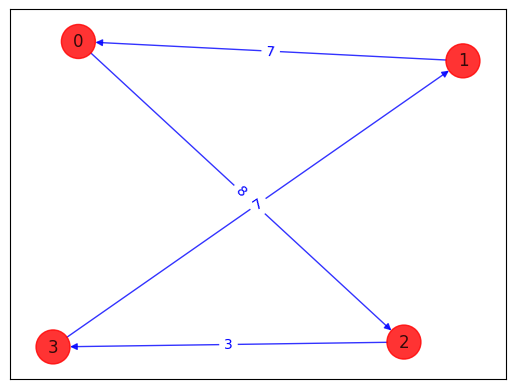

In [29]:
optimizer = L_BFGS_B(maxiter=300) # L_BFGS_B optimizer is used for its efficiency in terms of required evaluations of the objective functions, noiselless case
# ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
ansatz = EfficientSU2(qubitOp.num_qubits, reps=1) 
vqe = SamplingVQE(sampler=Sampler(), ansatz=ansatz, optimizer=optimizer)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, int_dists))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [ ]:
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, int_dists))
draw_tsp_solution(tsp.graph, z, colors, pos)